<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
401,12,5450.0,3,242,1.6,1,1,2004,0
6961,67,8100.0,1,101,1.4,3,1,2011,0
7039,77,1300.0,2,10,1.6,0,1,1984,2
2539,5,44999.0,0,87,3.0,0,1,2011,1
2555,23,10400.0,3,198,1.6,1,1,2008,0
6166,5,33500.0,3,1,1.5,3,1,2015,2
6567,55,6750.0,1,150,1.4,3,1,2008,0
1910,52,6800.0,3,170,1.6,3,1,2004,0
5152,17,4700.0,2,78,1.5,3,1,2011,0
7829,77,1450.0,5,100,1.6,0,1,1988,0


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [30]:
features=['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive']
target=['price']
X=df.copy()[features]
y=df.copy()[target]
X.head()

,make,body,mileage,engV,engType,registration,year,drive
0,23,0,68,2.5,1,1,2010,1
1,50,3,173,1.8,1,1,2011,2
2,50,2,135,5.5,3,1,2008,2
3,50,5,162,1.8,0,1,2012,0
4,55,0,83,2.0,3,1,2013,1


## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=50)

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [32]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [33]:
intercept=lin_reg.intercept_
intercept

array([-2284036.93230083])

In [34]:
coefficient=lin_reg.coef_
coefficient

array([[  -37.65517874, -1614.94662551,   -43.64298967,   309.15889188,
        -1140.34780676,  4398.17638681,  1148.18153219,  8586.72417861]])

## 1.5 Use the test data to make predictions.

In [0]:
y_pred=lin_reg.predict(X_test)

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [36]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
rmse

21140.39325848424

In [37]:
r2 = r2_score(y_test, y_pred)
r2

0.2819874252791523

## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

it's the gradient of the line we have fit by ordinary least squares to the training set of data for that particular dimension, i.e. if y=mx+c where x is an input from the year feature and y is our prediction, m is the slope of that line

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

RMSE is a measure of the difference between values predicted by the model and values observed

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

$R^2$ is the amount of variance in the target variable that one can predict from the sample variable


# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price']=np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

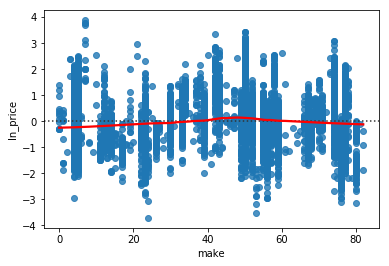

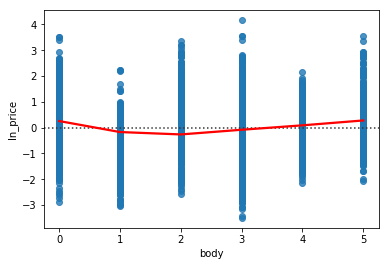

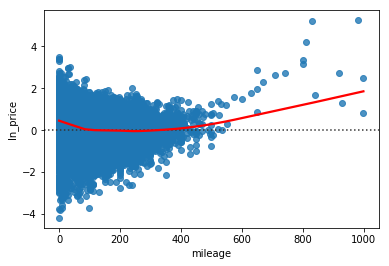

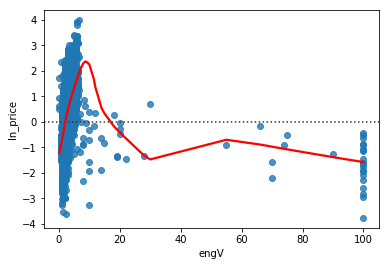

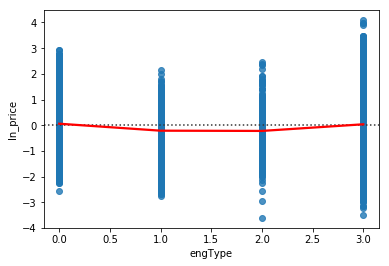

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


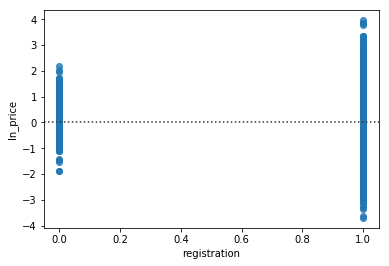

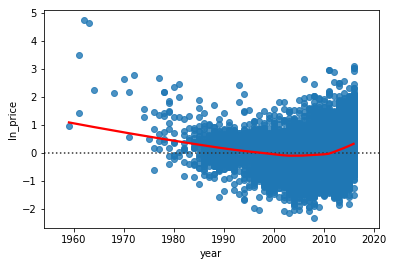

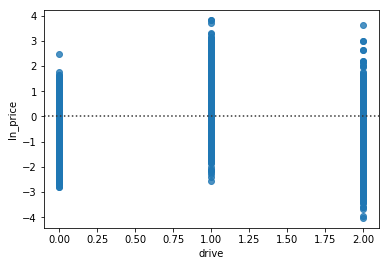

In [18]:
for feat in features:
    sns.residplot(df[feat], df['ln_price'], lowess=True, line_kws=dict(color='r'))
    plt.show()

In [0]:
# it looks like year has some kind of plynomial relationship which makes sense as some vintage models will be worth a lot, 
#while vehicles of medium age will be worth less.  enginve volume is anotehr good candidate.  mileage has definitely 
#not got a linear relationship to price, but it doesn't look polynomial either

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
df['year_sqrd']=df['year']**2
df['engV_sqrd']=df['engV']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [38]:
poly_feats=['year_sqrd','engV_sqrd']
all_feats=features+poly_feats
X_log=df.copy()[all_feats]
y_log=df.copy()['ln_price']
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X_log, y_log, train_size=0.80, test_size=0.20, random_state=50)
log_reg=LinearRegression()
log_reg.fit(X_trainl, y_trainl)
y_pred_log=log_reg.predict(X_testl)
r2_log = r2_score(y_testl, y_pred_log)
rmse_log=(np.sqrt(mean_squared_error(y_testl, y_pred_log)))
r2_log,rmse_log

(0.7470547393602549, 0.48855482468982786)

In [39]:
intercept_log=log_reg.intercept_
intercept_log

7143.565975080944

In [40]:
coefficient_log=log_reg.coef_
coefficient_log

array([-1.29649991e-03, -7.20352677e-02,  6.02881459e-04,  2.33804387e-01,
       -4.46964893e-02,  6.69043066e-01, -7.22829514e+00,  2.64738735e-01,
        1.83009158e-03, -2.40359455e-03])

## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

our coefficients now represent the rate of change per feature in percentage terms which can make them more intuative

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [42]:
tree = DecisionTreeRegressor(max_depth=5)
#using all the log data from previous example
X_log=df.copy()[all_feats]
y_log=df.copy()['ln_price']
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X_log, y_log, train_size=0.80, test_size=0.20, random_state=50)

#fitting new model
tree.fit(X_trainl,y_trainl)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [44]:
y_pred_tree=tree.predict(X_testl)
r2_DTR=r2_score(y_testl, y_pred_tree)
r2_DTR

0.8196159370350524

# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [45]:
#runnin log polynomial
X_log=df.copy()[all_feats]
y_log=df.copy()['ln_price']
model=sm.OLS(y_log, sm.add_constant(X_log))
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     2462.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        15:43:32   Log-Likelihood:                -5940.3
No. Observations:                8495   AIC:                         1.190e+04
Df Residuals:                    8484   BIC:                         1.198e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6816.3696    287.396     23.718   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [54]:

pd.options.display.float_format = '{:,.2f}'.format
vif = [variance_inflation_factor(sm.add_constant(X_log).values, i) for i in range(len(sm.add_constant(X_log).columns))]
#we have to reverse the log here so we don't jsut see all these scientific values

df_exp=pd.DataFrame(pd.Series(vif, sm.add_constant(X_log).columns))
df_exp.columns=['vif']
df_exp['vif']=np.e**df_exp['vif']
df_exp

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,vif
const,inf
make,2.89
body,3.24
mileage,6.97
engV,"18,329,620,213.76"
engType,3.17
registration,3.03
year,inf
drive,3.49
year_sqrd,inf


In [0]:
# in teh colinearity test as expected the column of ones is very high(though we ignore this), and year and year sq and also engV 
#and engV sqrd.  the rest are ok as far as colinearity is concerned